<a href="https://colab.research.google.com/github/ginttone/multi_deeplearning/blob/master/Nomal_saveDB_boston_housing_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATASET

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data

In [2]:
(x_train, y_train), (x_test,y_test)=load_data(path='boston_housing.npz', test_split=0.2 ,seed=113)

x_train.shape, y_train.shape, x_test.shape,y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [3]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

연속형 이기 때문에 y의 값은 볼필요 없다

x_train을 판다스에 넣고 어떤 상황인지 파악해보자

In [4]:
import pandas as pd

In [5]:
dfr = pd.DataFrame(x_train)
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


데이터타입(dtype)은 전부다 float-숫자로 되어있는 것 확인가능

레인지인덱스가 404개 이고 각 컬럼이 404개인 것 확인가능

(object 없다, null 없다, space 없다)

so, 전부가 숫자인 것을 알수 있었다.

### `>>>` DB에 저장하기 

In [6]:
import sqlite3
connect = sqlite3.connect('./db.sqlite3')

`>>>`이렇게 앞으로는 습관적으로 데이타 로드하면 데이타프레임에 넣고 db에 담는 작업을 해준다.

In [7]:
dfr.to_sql('boston_housing_resource', connect, if_exists='append',index=False)

`>>>`db의 데이터 불러와서 사용한다.

In [8]:
df = pd.read_sql_query('select * from boston_housing_resource',connect)

In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.235007,23.752980,6.807086,0.241089,0.117220,0.709348,27.923348,2.028956,8.692969,166.271429,2.199018,94.052820,7.250049
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


mean 보면 단위가 다 다르기때문에 .StandardScaler 해줘야한다


In [10]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

fit은 트레이닝

In [11]:
scaler.fit(x_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

x_train으로 훈련 완료


transform은 바꿔주는 것

In [12]:
x_train= scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape

((404, 13), (102, 13))

해당부분이 얼마나 평이하게 바뀌었는가 확인

df.describe()

결론적으로 이런 과정을 거치는 이유는 안정적인 단위로 만들어 준 것

In [13]:
df= pd.DataFrame(x_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.015414e-16,1.099231e-17,1.743380e-15,-1.266863e-16,-5.253773e-15,6.414149e-15,2.984411e-16,4.946538e-16,1.126711e-17,-1.981363e-16,2.366864e-14,5.956800e-15,6.139204e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


`>>>` 스케일링 한 x_train 데이터를 db에 담기 

In [14]:
df.to_sql('boston_housing_scale_x_train', connect, if_exists='append', index=False )

`>>>` db에 담았던 스케일링 한 x_train 데이터 가져오기

In [15]:
dfr = pd.read_sql_query('select * from boston_housing_scale_x_train',connect)

In [16]:
dfr.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,8.080000e+02,8.080000e+02,8.080000e+02,8.080000e+02,8.080000e+02,8.080000e+02,8.080000e+02,8.080000e+02,8.080000e+02,8.080000e+02,8.080000e+02,8.080000e+02,8.080000e+02
mean,-1.035338e-16,1.209154e-17,1.751075e-15,-1.292970e-16,-5.251850e-15,6.416828e-15,2.987159e-16,4.935546e-16,1.003048e-17,-1.979989e-16,2.366644e-14,5.950720e-15,6.147448e-16
std,1.000619e+00,1.000619e+00,1.000619e+00,1.000619e+00,1.000619e+00,1.000619e+00,1.000619e+00,1.000619e+00,1.000619e+00,1.000619e+00,1.000619e+00,1.000619e+00,1.000619e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


## MODEL

In [17]:
model = tf.keras.models.Sequential()

`>>`input layer/ hidden layer/ output layer

* hidden layer에서 사용하는 activation

activation : 뒤에 들어가는 싱글코테이션 안에 들어가는 글자는 펑션이다. 사용자가 사용하기 위해 알리야스(별칭)을 준 것이다.


sigmoid(...): Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x)).

softmax(...): Softmax converts a vector of values to a probability distribution. 범주형 마지막 아웃풋에서 사용

linear(...): Linear activation function (pass-through).

relu(...): Applies the rectified linear unit activation function.

tanh(...): Hyperbolic tangent activation function.


In [18]:
model.add(tf.keras.Input(shape=(13))) 

# tf.keras.activations.relu()
model.add(tf.keras.layers.Dense(64, activation='relu')) #hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) #hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) #hidden layer

model.add(tf.keras.layers.Dense(1,)) 

# sqd= tf.keras.optimizers.SGD( 
#     learning_rate=0.001,
#     momentum=0.004
# )

# model.compile(optimizer='sgd', loss='mse' , metrics=['mae'])

model.compile(optimizer='adam', loss='mse' , metrics=['mae'])

 검증용 
 * 연속형은 metrics = mae 
 *분류형은 어큐런시 
 * 둘다는 loss

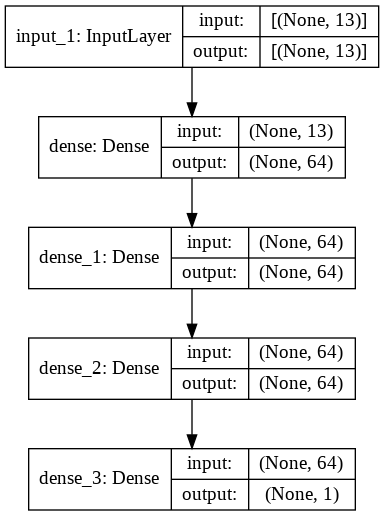

In [19]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


핏팅 전 검증용 

validation_split= 하는 이유는 실제로 쏠림현상(오버피팅) 있는지 확인하는것 

데이터를 내부적으로 쪼개서 실제 70% 인 데이터가 loss 측정하고, val은 나머지 30%를 넣어 결과값을 비교한다.

In [29]:
hist = model.fit(x_train, y_train, epochs=500, validation_split=0.3)

Epoch 1/500
9/9 [==============================] - 0s 8ms/step - loss: 0.8103 - mae: 0.6069 - val_loss: 7.4348 - val_mae: 1.8770
Epoch 2/500
9/9 [==============================] - 0s 6ms/step - loss: 0.7227 - mae: 0.5621 - val_loss: 7.3188 - val_mae: 1.8565
Epoch 3/500
9/9 [==============================] - 0s 4ms/step - loss: 0.7911 - mae: 0.6148 - val_loss: 7.9908 - val_mae: 1.9584
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 0.8430 - mae: 0.6256 - val_loss: 6.9732 - val_mae: 1.8832
Epoch 5/500
9/9 [==============================] - 0s 4ms/step - loss: 0.8163 - mae: 0.6445 - val_loss: 7.5277 - val_mae: 1.9034
Epoch 6/500
9/9 [==============================] - 0s 6ms/step - loss: 0.7608 - mae: 0.5791 - val_loss: 7.7756 - val_mae: 1.9307
Epoch 7/500
9/9 [==============================] - 0s 4ms/step - loss: 0.7249 - mae: 0.5570 - val_loss: 7.4182 - val_mae: 1.8767
Epoch 8/500
9/9 [==============================] - 0s 4ms/step - loss: 0.7549 - mae: 0.5733 - val

* activations = sigmoid 

optimizer = sgd 결과 100번째

loss: 8.4236 - mae: 2.1771 

* activations = relu

optimizer = adam 결과 100번째  

loss: 3.7667 - mae: 1.4202


## Evaluation


엑티베이션

In [26]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 16.5555 - mae: 2.5196


[16.55552101135254, 2.5195629596710205]

In [22]:
model.evaluate(x_train, y_train)

13/13 [==============================] - 0s 1ms/step - loss: 3.6771 - mae: 1.4230


[3.6770989894866943, 1.4229873418807983]

검증 hist


In [30]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

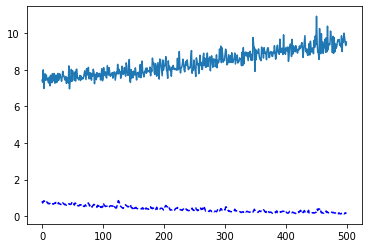

In [38]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], 'b--')
plt.plot(hist.history['val_loss'])
plt.show()

## Service

In [23]:
x_train[10]

array([ 0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491])

기존결과

model.predict([[2.2876e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
       6.4050e+00, 8.5400e+01, 2.7147e+00, 5.0000e+00, 3.8400e+02,
       2.0900e+01, 7.0800e+01, 1.0630e+01]])


       array([[20.722834]], dtype=float32)

hidden layer 늘리고서 결과 

model.predict([[2.2876e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
       6.4050e+00, 8.5400e+01, 2.7147e+00, 5.0000e+00, 3.8400e+02,
       2.0900e+01, 7.0800e+01, 1.0630e+01]])

       array([[12.5560875]], dtype=float32)

표준화 시킨 결과

model.predict([[-0.380999  , -0.48361547, -0.37402299, -0.25683275, -0.31887859,
        0.1945502 ,  0.58730449, -0.50578021, -0.51114231, -0.13178499,
        1.10299743, -3.02127105, -0.29132553]])

        array([[18.246944]], dtype=float32)

x_train[10]의 결과(트레이닝 값)

model.predict([[0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491]])

        array([[12.658238]], dtype=float32)

y_train[10]의 결과 (실제값)

12.1


In [24]:
model.predict([[0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491]])

array([[12.99925]], dtype=float32)

In [25]:
y_train[10]

12.1